# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
%cd yolov5 
!pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # force reload

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/urnisha/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-2-10 Python-3.10.12 torch-2.1.2+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Random Images 

In [7]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [8]:
results = model(img)
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,743.290527,48.343628,1141.756592,720.000000,0.879861,0,person
1,441.989624,437.336670,496.585083,710.036255,0.675119,27,tie
2,123.051086,193.238098,714.690674,719.771301,0.666694,0,person
3,978.989807,313.579468,1025.302856,415.526184,0.261517,27,tie


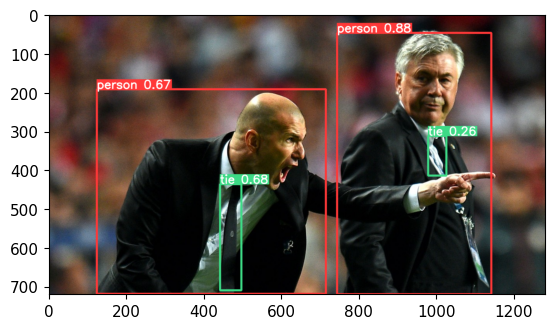

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

# 4. Real Time Detections

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [11]:
import uuid   
import os
import time

In [14]:
%cd yolov5

/home/urnisha/Downloads/yolov5


In [14]:
IMAGES_PATH = os.path.join('training_data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [15]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [15]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [16]:
!pip install pyqt5 lxml --upgrade

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [17]:
%cd labelImg

/home/urnisha/Downloads/yolov5/labelImg


In [18]:
sudo apt-get install pyqt5-dev-tools
sudo pip3 install -r requirements/requirements-linux-python3.txt
make qt5py3

SyntaxError: invalid syntax (1920446622.py, line 1)

In [23]:
import os
print(os.getcwd())

/home/urnisha/Downloads/yolov5


In [21]:
%cd ..

/home/urnisha/Downloads/yolov5


In [22]:
!python3 train.py --img 320 --batch 16 --epochs 500 --data final.yml --weights yolov5s.pt --workers 2 


2024-02-10 17:41:30.880322: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 17:41:30.880530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 17:41:30.938488: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=final.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, opti

# 6. Load Trained Model

In [7]:
%cd yolov5

/home/urnisha/Downloads/yolov5


In [16]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/urnisha/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-2-25 Python-3.10.12 torch-2.1.2+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [9]:
img = "/home/urnisha/Desktop/images5.jpeg"

In [10]:
model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [84]:
import torch
from torchvision import transforms
from PIL import Image


# Load and preprocess a sample image
image_path = "/home/urnisha/Downloads/yolov5/training_data/images/drowsy.71787c3a-aede-11ee-ad57-89438aa218ff.jpg"
image = Image.open(image_path).convert("RGB")

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust the size based on your model's input requirements
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply transformation to the image
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Set the model to evaluation mode
model.eval()

# Perform a forward pass
with torch.no_grad():
    output = model(input_image)

# Print the shape of the output tensor
# print("Output Shape:", output.shape)
output_np = output.numpy()  # Convert PyTorch tensor to NumPy array

# Select a specific part of the tensor, e.g., the first element in the sequence
selected_output = output_np[0, :, :21]  

# Create a DataFrame from the selected part of the tensor
output_df = pd.DataFrame(selected_output, columns=[f"Feature_{i}" for i in range(selected_output.shape[1])])

# Print the DataFrame
print("Output DataFrame:")
print(output_df)


Output DataFrame:
       Feature_0   Feature_1   Feature_2   Feature_3  Feature_4  ...  \
0       2.016405    6.460310   11.650839   21.569588   0.000379  ...   
1      11.673043    5.250291   20.425320   34.572399   0.000460  ...   
2      16.266281    6.478371   20.527945   31.173368   0.000465  ...   
3      25.104509    5.437062   15.089252   18.355753   0.000426  ...   
4      34.015087    2.858038   10.645656   10.440368   0.000153  ...   
...          ...         ...         ...         ...        ...  ...   
3082   76.183128  200.089767  454.766418  338.333862   0.003427  ...   
3083  115.094994  199.553986  599.077454  326.250458   0.006447  ...   
3084  141.582947  196.643829  409.000061  346.477570   0.008548  ...   
3085  172.663544  195.896317  379.810394  350.549683   0.004084  ...   
3086  208.477051  196.784973  409.259521  417.446716   0.002442  ...   

      Feature_16  Feature_17  Feature_18  Feature_19  Feature_20  
0       0.056801    0.094679    0.009964    0.0074

In [12]:
results = model(img)

FileNotFoundError: [Errno 2] No such file or directory: '/home/urnisha/Desktop/images5.jpeg'

In [13]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 2.3ms pre-process, 72.4ms inference, 0.3ms NMS per image at shape (1, 3, 480, 640)


In [73]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,80.208191,42.822021,206.923248,125.560844,0.626676,16,drowsy


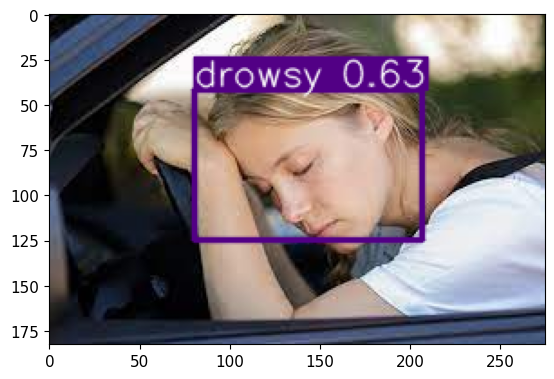

In [74]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
#real time detection
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [16]:
torch.save(model,'/home/urnisha/Downloads/drowsy_model.pt')

In [10]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/home/urnisha/Downloads/yolov5


In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/urnisha/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-2-23 Python-3.10.12 torch-2.1.2+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [18]:
!python3 export.py --weights runs/train/exp/weights/best.pt  --include tflite --img 416

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-270-g4733b4d Python-3.10.12 torch-2.1.2+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 10647, 22) (13.7 MB)
2024-01-11 15:54:55.685289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 15:54:55.685376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register f

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/home/urnisha/Downloads/yolov5/runs/train/exp/weights/best-fp16.tflite', force_reload=True)

In [2]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/home/urnisha/Downloads/yolov5/runs/train/exp/weights/best-fp16.tflite")
interpreter.allocate_tensors()

# Get input details.
input_details = interpreter.get_input_details()

# Print the input shape.
input_shape = input_details[0]['shape']
print("Input shape:", input_shape)

Input shape: [  1 416 416   3]


In [5]:
%cd yolov5

/home/urnisha/Downloads/yolov5


In [8]:
!python3 detect.py --weights runs/train/exp/weights/best-fp16.tflite --img 416 --conf 0.25 --source /home/urnisha/Downloads/drive.jpeg

detect: weights=['runs/train/exp/weights/best-fp16.tflite'], source=/home/urnisha/Downloads/drive.jpeg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-270-g4733b4d Python-3.10.12 torch-2.1.2+cu118 CPU

2024-01-13 22:00:01.946339: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 22:00:01.946388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

In [101]:
# Load your image and preprocess it
from PIL import Image

image_path = "/home/urnisha/Downloads/drive.jpeg"
image = Image.open(image_path)
image = image.resize((input_shape[2], input_shape[1]))  # Resize to the input shape of the model
image_array = np.array(image, dtype=np.float32) / 255.0  # Normalize the pixel values
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Set the input tensor with your image data
interpreter.set_tensor(input_details[0]['index'], image_array)

# Invoke the interpreter
interpreter.invoke()

# Get and process the output data
output_data = interpreter.get_tensor(output_details[0]['index'])
# Process the output_data as required for your use case
print(output_data)


[[[  0.0029066     0.01231    0.057263 ...   0.0049708    0.054587    0.050716]
  [   0.007479    0.013719    0.014733 ...    0.018565     0.13894     0.25178]
  [  0.0084858    0.015176    0.080814 ...    0.031413     0.10813     0.13613]
  ...
  [    0.96148     0.97147      0.4221 ...    0.028776    0.028546    0.026333]
  [     0.9789     0.96623     0.36042 ...    0.041072    0.029006    0.027316]
  [    0.94528     0.95649      1.7295 ...    0.022673    0.041088     0.03135]]]


In [25]:
print(output_data.shape)

(1, 10647, 22)


In [27]:
import pandas
output_data.pandas().xyxy[0]

AttributeError: 'numpy.ndarray' object has no attribute 'pandas'

In [18]:
# Assuming output_data is your model's output tensor
min_value = np.min(output_data)
max_value = np.max(output_data)

if min_value >= 0 and max_value <= 1:
    print("Output data is normalized in the range [0, 1]")
elif min_value >= -1 and max_value <= 1:
    print("Output data is normalized in the range [-1, 1]")
else:
    print("Output data is not normalized or is normalized differently")


Output data is not normalized or is normalized differently


TypeError: Invalid shape (1, 10647, 22) for image data

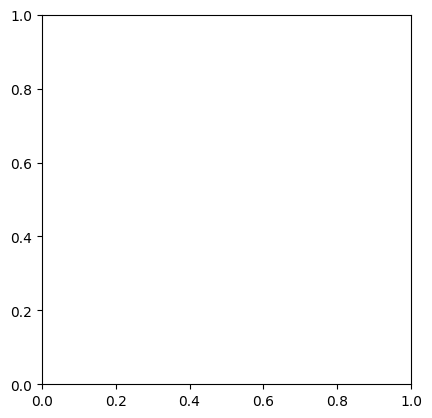

In [23]:
import matplotlib.pyplot as plt

# Assuming output_data is a 4D tensor representing an image (batch_size, height, width, channels)
# Adjust the code based on the actual structure of your output data

# Remove the batch dimension if present (assuming batch_size=1)
output_image = output_data[0] if len(output_data.shape) == 4 else output_data
#output_image = output_image.reshape((output_image.shape[0], output_image.shape[1], 1))
# If the output is normalized image data, you might need to de-normalize it
output_image = output_image * 255.0


# Ensure the values are within the valid range (0 to 255 for uint8 images)
output_image = np.clip(output_image, 0, 255).astype(np.uint8)

# Visualize the output image
plt.imshow(output_image)
plt.title("Model Output")
plt.show()


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/home/urnisha/Downloads/yolov5/runs/train/exp/weights/best.pt', force_reload=True)
img = '/home/urnisha/Downloads/drive.jpeg'
results = model(img)



Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/urnisha/.cache/torch/hub/master.zip


In [28]:
results.pandas().xyxy[0]

NameError: name 'results' is not defined

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/home/urnisha/Downloads/yolov5/runs/train/exp/weights/best-fp16.tflite")
interpreter.allocate_tensors()

# Get input details.
output_details = interpreter.get_output_details()

# Print information about the input tensor.
print("Output Tensor Details:")
print("Name:", output_details[0]['name'])
print("Shape:", output_details[0]['shape'])
print("Data Type:", output_details[0]['dtype'])


Output Tensor Details:
Name: StatefulPartitionedCall:0
Shape: [    1 10647    22]
Data Type: <class 'numpy.float32'>


In [102]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/home/urnisha/Downloads/yolov5/runs/train/exp/weights/best-fp16.tflite")
interpreter.allocate_tensors()

# Get input and output details.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess your image (replace 'path/to/your/image.jpg' with the actual image path).
image_path =  '/home/urnisha/Downloads/drive.jpeg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(input_details[0]['shape'][1], input_details[0]['shape'][2]))
image_array = tf.keras.preprocessing.image.img_to_array(image)
input_data = np.expand_dims(image_array, axis=0)

# Set input tensor.
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference.
interpreter.invoke()

# Get output tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

# Assuming 'xyxy' is the bounding box coordinates, you can access them like this:
xyxy_result = output_data[0]

# Print the bounding box coordinates.
print(xyxy_result)


[[    0.01793    0.015047    0.041994 ...    0.012049    0.014259    0.060723]
 [    0.01511    0.018409    0.014675 ...     0.02747    0.098922    0.067526]
 [   0.020693    0.026913     0.21663 ...   0.0034315     0.37722    0.019303]
 ...
 [    0.97324     0.92474     0.64629 ...     0.01778     0.39711    0.043878]
 [    0.97911     0.93068      0.2513 ...    0.024491     0.18008    0.010703]
 [     0.9583     0.93704     0.35453 ...    0.030492     0.47083    0.090287]]
